In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns 

In [2]:
def make_num_list(df):
    num_list = []
    i = 1
    while i < len(df)+1:
        num_list.append(i)
        i = i + 1
    df_new = df.copy()
    df_new['num'] = num_list
    return df_new

def time_list(df, t1, t2, graph): # 1-обычный, 2 - триграф
    df = make_num_list(df)
    t_list = []
    i = 1
    while i < len(df) - graph + 1:
        new_time = (int(df.loc[df['num'] == (i+graph)][t1])-int(df.loc[df['num'] == i][t2]))/1000
        t_list.append(new_time)
        i = i + 1
    while graph > 0:
        t_list.append(0)
        graph = graph - 1
    return t_list

def create_and_save_key(df):
    df_key = df.loc[df['action_type'] == 'key']
    df_key_time = df_key[['user_id', 'session', 'action_type', 'key_code', 'down', 'up', 'time']]
#    df_key_time.to_csv('key.csv')
    return df_key_time

def do_features(df):
    df['DD'] = time_list(df, 'down', 'down', 1)
    df['UD'] = time_list(df, 'down', 'up', 1)
    df['UU'] = time_list(df, 'up', 'up', 1)
    df['DU'] = time_list(df, 'up', 'down', 1)
    df['DD3'] = time_list(df, 'down', 'down', 2)
    df['UD3'] = time_list(df, 'down', 'up', 2)
    df['UU3'] = time_list(df, 'up', 'up', 2)
    df['DU3'] = time_list(df, 'up', 'down', 2)
    df['DD4'] = time_list(df, 'down', 'down', 3)
    df['UD4'] = time_list(df, 'down', 'up', 3)
    df['UU4'] = time_list(df, 'up', 'up', 3)
    df['DU4'] = time_list(df, 'up', 'down', 3)
    df['DD5'] = time_list(df, 'down', 'down', 4)
    df['UD5'] = time_list(df, 'down', 'up', 4)
    df['UU5'] = time_list(df, 'up', 'up', 4)
    df['DU5'] = time_list(df, 'up', 'down', 4)
    df['kpm5'] = kpm(df, 5)
    df['kpm10'] = kpm(df, 10)
    df['skew5_time'] = skew_text_input(df, 5, 'time')
    df['skew10_time'] = skew_text_input(df, 10, 'time')
    df['skew20_time'] = skew_text_input(df, 10, 'time')
    df['skew5_kpm5'] = skew_text_input(df, 5, 'kpm5')
    df['skew10_kpm5'] = skew_text_input(df, 10, 'kpm5')
    df['skew5_kpm10'] = skew_text_input(df, 5, 'kpm10')
    df['skew10_kpm10'] = skew_text_input(df, 10, 'kpm10')
    df['error_rate'] = error_rate(df, 20)
    return df

def kpm(df, num):
    df = make_num_list(df)
    v = []
    i = 1
    while i < len(df) - num + 1:
        t = (int(df.loc[df['num'] == (i+num-1)]['up'])-int(df.loc[df['num'] == i]['down']))/1000
        new_v = num/t
        v.append(new_v*60)
        i = i + 1
    while num > 0:
        t = (int(df.loc[df['num'] == (i+num-2)]['up'])-int(df.loc[df['num'] == i]['down']))/1000
        new_v = num/t
        v.append(new_v)
        i += 1
        num = num - 1
    return v

def skew_text_input(df, num, feature):
    s = []
    list_feature = list(df[feature])
    i = 0
    while i < len(df) - num + 1:
        s.append(skew(list_feature[i:i+num]))
        i = i + 1
    while num > 1:        
        s.append(skew(list_feature[i:i+num-1]))
        i += 1
        num = num - 1
    return s

def num_of_error(l):
    num = 0
    for i in l:
        if 0<i<3:
            num += 1
    return num

def error_rate(df, num):
    error_rate_list = []
    key_code = list(df['key_code'])
    i = 0
    while i < len(df) - num + 1:
        rate = num_of_error(key_code[i:i+num])/num
        error_rate_list.append(rate)
        i = i + 1
    while num > 1:
        error_rate_list.append(num_of_error(key_code[i:i+num-1])/(num-1))
        i += 1
        num = num - 1
    return error_rate_list

def create_and_save_mouse(df, name):
    df_mouse = df.loc[df['action_type'] == 'mouse']
    df_mouse_time = df_mouse[['user_id', 'session', 'action_type', 'key_code', 'down', 'up', 'time']]
    df_mouse_time.to_csv(name + '.csv')
    return df_mouse_time

def remove_outlier (df):
    features = ['time', 'UD', 'DD3', 'DD4', 'DD5']
    for f in features:
        bottom = np.percentile(df[f], 5)
        top = np.percentile(df[f], 95)
        df = df.loc[(bottom < df[f])  & (df[f] < top)].reset_index(drop=True)
    return df

def print_box (df):
    col_name = list(df.columns[7:])
    for f in col_name:
        plt.figure()
        df[['session', f]].boxplot(column=[f], figsize=(6,8))
        
def normalization(df):
    X = df
    cols = list(df.columns)
    scaler.fit(X)
    X = scaler.transform(X)
    return pd.DataFrame(X, columns=cols)

In [3]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [4]:
df1 = create_and_save_key(pd.read_csv('datasets\dataset_89270693456.csv', delimiter=',')) #Денис_л
df2 = create_and_save_key(pd.read_csv('datasets\dataset_89196230374.csv', delimiter=',')) #Никита_л
df3 = create_and_save_key(pd.read_csv('datasets\dataset_89270698741.csv', delimiter=',')) #Максим_л
df4 = create_and_save_key(pd.read_csv('datasets\dataset_80171109282.csv', delimiter=',')) #Максим_у
df5 = create_and_save_key(pd.read_csv('datasets\dataset_89176732344.csv', delimiter=',')) #Даша_л
df6 = create_and_save_key(pd.read_csv('datasets\dataset_89273345194.csv', delimiter=',')) #Даша_у
df7 = create_and_save_key(pd.read_csv('datasets\dataset_89162735523.csv', delimiter=',')) #Сергей_л
df8 = create_and_save_key(pd.read_csv('datasets\dataset_89193729288.csv', delimiter=',')) #Алина_л
df9 = create_and_save_key(pd.read_csv('datasets\dataset_89273028630.csv', delimiter=',')) #Люба_л
df10 = create_and_save_key(pd.read_csv('datasets\dataset_89163828720.csv', delimiter=',')) #Люба_у
#df11 = create_and_save_key(pd.read_csv('datasets\dataset_89271245194.csv', delimiter=',')) #Мама_у

## Вычисление признаков

In [5]:
data1 = do_features(df1)
data2 = do_features(df2)
data3 = do_features(df3)
data4 = do_features(df4)
data5 = do_features(df5)
data6 = do_features(df6)
data7 = do_features(df7)
data8 = do_features(df8)
data9 = do_features(df9)
data10 = do_features(df10)
#data11 = do_features(df11)

## Удаление выбросов

In [6]:
data1 = remove_outlier(data1)
data2 = remove_outlier(data2)
data3 = remove_outlier(data3)
data4 = remove_outlier(data4)
data5 = remove_outlier(data5)
data6 = remove_outlier(data6)
data7 = remove_outlier(data7)
data8 = remove_outlier(data8)
data9 = remove_outlier(data9)
data10 = remove_outlier(data10)
#data11 = remove_outlier(data11)

## Нормализация

In [7]:
col_name = list(data1.columns[6:])
features_data1 = data1[col_name]
features_data2 = data2[col_name]
features_data3 = data3[col_name]
features_data4 = data4[col_name]
features_data5 = data5[col_name]
features_data6 = data6[col_name]
features_data7 = data7[col_name]
features_data8 = data8[col_name]
features_data9 = data9[col_name]
features_data10 = data10[col_name]
#features_data11 = data11[col_name]

In [8]:
features_data1 = normalization(features_data1)
features_data2 = normalization(features_data2)
features_data3 = normalization(features_data3)
features_data4 = normalization(features_data4)
features_data5 = normalization(features_data5)
features_data6 = normalization(features_data6)
features_data7 = normalization(features_data7)
features_data8 = normalization(features_data8)
features_data9 = normalization(features_data9)
features_data10 = normalization(features_data10)
#features_data11 = normalization(features_data11)

## Зададим y

In [9]:
features_data1['y'] = 0
features_data2['y'] = 0
features_data3['y'] = 0
features_data4['y'] = 1
features_data5['y'] = 0
features_data6['y'] = 1
features_data7['y'] = 0
features_data8['y'] = 0
features_data9['y'] = 0
features_data10['y'] = 1
#features_data11['y'] = 1

## Объединим в один df

In [10]:
dataframe = features_data1
dataframe = dataframe.merge(features_data2, how='outer')
dataframe = dataframe.merge(features_data3, how='outer')
dataframe = dataframe.merge(features_data4, how='outer')
dataframe = dataframe.merge(features_data5, how='outer')
dataframe = dataframe.merge(features_data6, how='outer')
dataframe = dataframe.merge(features_data7, how='outer')
dataframe = dataframe.merge(features_data8, how='outer')
dataframe = dataframe.merge(features_data9, how='outer')
dataframe = dataframe.merge(features_data10, how='outer')
#dataframe = dataframe.merge(features_data11, how='outer')

In [11]:
dataframe.to_csv('big_df.csv')

In [12]:
dataframe

,time,DD,UD,UU,DU,DD3,UD3,UU3,DU3,DD4,...,kpm10,skew5_time,skew10_time,skew20_time,skew5_kpm5,skew10_kpm5,skew5_kpm10,skew10_kpm10,error_rate,y
0,0.122563,0.088115,0.080694,0.084565,0.093193,0.149976,0.150820,0.153865,0.157680,0.079116,...,0.520572,0.400000,0.442905,0.442905,0.397718,0.380144,0.624360,0.723846,0.25,0
1,0.097493,0.115311,0.110713,0.111658,0.117504,0.082090,0.084942,0.086232,0.088426,0.295600,...,0.543253,0.460719,0.431590,0.431590,0.496356,0.443876,0.993587,0.913577,0.30,0
2,0.069638,0.011422,0.008262,0.007937,0.012426,0.310303,0.316120,0.314251,0.312245,0.311093,...,0.267059,0.297920,0.451972,0.451972,0.238716,0.502474,0.180241,0.415573,0.35,0
3,0.050139,0.373130,0.376480,0.370005,0.367909,0.420318,0.428089,0.429227,0.424635,0.305722,...,0.245405,0.888746,0.938262,0.938262,0.304377,0.585522,0.378100,0.409120,0.40,0
4,0.011142,0.135708,0.139906,0.138205,0.135332,0.093885,0.104247,0.104831,0.099449,0.240446,...,0.256315,0.567696,0.924018,0.924018,0.376337,0.621440,0.535074,0.406556,0.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433,0.000000,0.151229,0.151649,0.152069,0.151827,0.094660,0.094676,0.094842,0.094826,0.363380,...,0.019337,0.409485,0.197162,0.197162,0.814856,0.544949,0.719260,0.999897,0.00,1
4434,0.008621,0.040328,0.040328,0.040748,0.040949,0.385294,0.385025,0.385358,0.385626,0.259451,...,0.019364,0.500000,0.123666,0.123666,0.107967,0.549123,0.625117,0.953968,0.00,1
4435,0.008621,0.518168,0.518168,0.518799,0.518900,0.356513,0.356240,0.356240,0.356513,0.290289,...,0.018797,0.409485,0.171945,0.171945,0.415136,0.566595,0.615330,0.904376,0.00,1
4436,0.004310,0.084016,0.084226,0.084646,0.084628,0.037431,0.037271,0.037105,0.037265,0.190363,...,0.020486,0.409485,0.172467,0.172467,0.884288,0.682973,0.999993,0.789688,0.00,1


In [19]:
df_corr = dataframe.drop(['y', 'error_rate'], axis=1)

In [23]:
df_corr = df_corr.rename({'time':'KD'}, axis=1)

## Корреляция

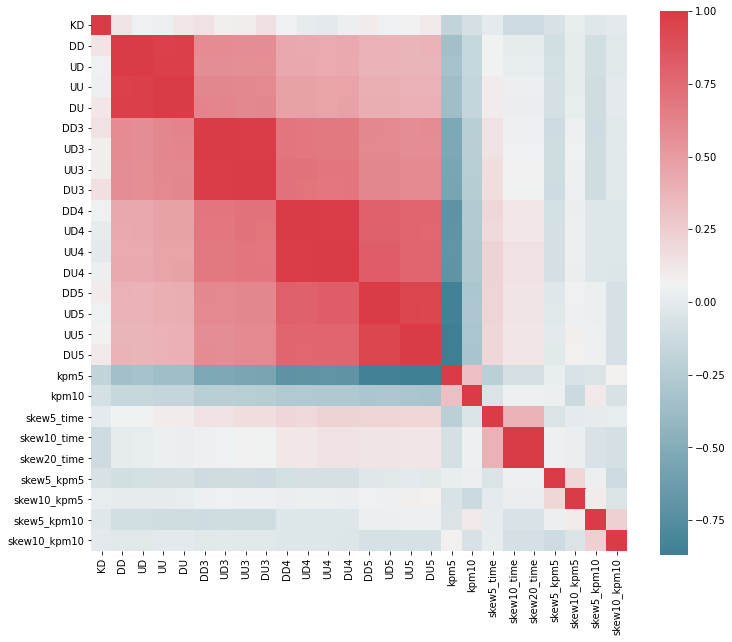

In [24]:
f, ax = plt.subplots(figsize=(12, 10))
corr = df_corr.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax);

## Удалим лишнее 

In [38]:
dataframe.columns

Index(['time', 'DU', 'DU3', 'DU4', 'DU5', 'kpm5', 'kpm10', 'skew5_time',
       'skew20_time', 'skew5_kpm5', 'skew10_kpm5', 'skew5_kpm10',
       'skew10_kpm10', 'y'],
      dtype='object')

In [36]:
df1 = dataframe.drop(['DD', 'UD', 'UU', 'DD3', 'UD3', 'UU3', 'DD4', 'UD4', 'UU4', 'DD5', 'UD5', 'UU5', 'skew10_time', 'error_rate'], axis=1, inplace=True)

KeyError: "['DD' 'UD' 'UU' 'DD3' 'UD3' 'UU3' 'DD4' 'UD4' 'UU4' 'DD5' 'UD5' 'UU5'\n 'skew10_time' 'error_rate'] not found in axis"

In [40]:
df_corr = dataframe.drop(['y'], axis=1)

In [41]:
df_corr = df_corr.rename({'time':'KD'}, axis=1)

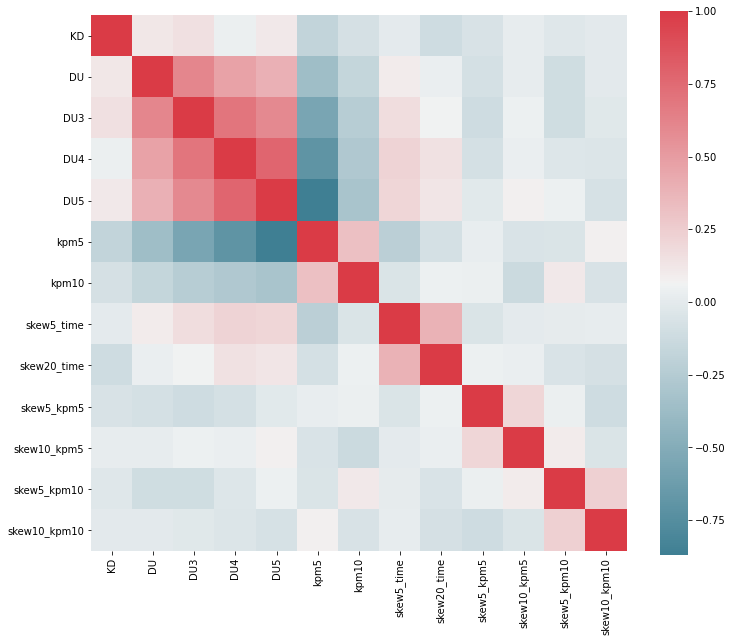

In [43]:
f, ax = plt.subplots(figsize=(12, 10))
corr = df_corr.corr() 
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax);

In [34]:
dataframe.to_csv('ready_df.csv')

In [35]:
dataframe

,time,DU,DU3,DU4,DU5,kpm5,kpm10,skew5_time,skew20_time,skew5_kpm5,skew10_kpm5,skew5_kpm10,skew10_kpm10,y
0,0.122563,0.093193,0.157680,0.076923,0.269715,0.358702,0.520572,0.400000,0.442905,0.397718,0.380144,0.624360,0.723846,0
1,0.097493,0.117504,0.088426,0.279827,0.307724,0.317283,0.543253,0.460719,0.431590,0.496356,0.443876,0.993587,0.913577,0
2,0.069638,0.012426,0.312245,0.296900,0.224593,0.416302,0.267059,0.297920,0.451972,0.238716,0.502474,0.180241,0.415573,0
3,0.050139,0.367909,0.424635,0.291601,0.438821,0.208974,0.245405,0.888746,0.938262,0.304377,0.585522,0.378100,0.409120,0
4,0.011142,0.135332,0.099449,0.237441,0.182317,0.480924,0.256315,0.567696,0.924018,0.376337,0.621440,0.535074,0.406556,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433,0.000000,0.151827,0.094826,0.363717,0.226503,0.549855,0.019337,0.409485,0.197162,0.814856,0.544949,0.719260,0.999897,1
4434,0.008621,0.040949,0.385626,0.259523,0.183975,0.600972,0.019364,0.500000,0.123666,0.107967,0.549123,0.625117,0.953968,1
4435,0.008621,0.518900,0.356513,0.290499,0.180509,0.605553,0.018797,0.409485,0.171945,0.415136,0.566595,0.615330,0.904376,1
4436,0.004310,0.084628,0.037265,0.190159,0.273030,0.502910,0.020486,0.409485,0.172467,0.884288,0.682973,0.999993,0.789688,1


## Dataframe  готов